In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h1 align='center'>Introduction to Python $\&$ the Jupyter Environment</h1>

<h4 align='center'>Workshop Facilitator: Laura Gutierrez Funderburk, Department of Mathematics, Spring 2019</h4>

In [4]:
from IPython.display import HTML

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,



In [5]:

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(12,4))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.axis("Off")
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
# equivalent to rcParams['animation.html'] = 'html5'
%matplotlib inline
HTML(anim.to_html5_video())

<h2 align='center'>Introduction</h2>

In this workshop participants will have an opportunity to learn basic programming with Python while using the Jupyter environment to define, test and implement functions. At the end of the workshop, participants will be given resources and challenge exercises. 

<h2 align='center'>Why Python</h2>

* Python is currently a "hot" programming language
* Python is (relatively) intuitive - there are lots of online resources available to learn and improve your skills
* Python is great for data analysis and visualization: a highly sought after skill in the current job market


<h2 align='center'>Workshop Overview</h2>

In this workshop we will cover basic for loops, if/else and while statements, importing libraries and 2D visualization. 

Via a series of guided exercises, we will simulate an unfair probabilistic game with two players.


In [6]:
import matplotlib.patches as mpatches
from ipywidgets import interact, interact_manual, widgets

import random
import matplotlib.pyplot as plt

style = {'description_width': 'initial'}


def roll_dice():
    positive_luck = random.choice([1,2,4,5,6])
    negative_luck = random.choice([1,2,4,5,6])
    
    if positive_luck - negative_luck >= 0:
        return True
    else:
        return False

def simulate_unfair_game(points_A,points_C,number_of_games):
    
    x_coord = []
    y_coord_A = []
    y_coord_C = []
    
    value_A = points_A
    value_C = points_C
    
    
    turn_number = 1
    
    while turn_number <= number_of_games:
        if roll_dice():
            x_coord.append(turn_number)
            turn_number += 1
            
            y_coord_A.append(value_A)
            y_coord_C.append(value_C)
            value_A = value_A + (value_C/2)
            value_C = value_C  - (value_C/2)
            
        else:
            x_coord.append(turn_number)
            turn_number += 1
            
            y_coord_A.append(value_A)
            y_coord_C.append(value_C)
            value_A = value_A - (value_A/2)
            value_C = value_C  + (value_A/2)
    return [x_coord,y_coord_A,y_coord_C]


def plot_unfair_simulation(number_turns):

    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xlim([0,number_turns + 1])
    ax.set_ylim([0,200])
    ax.grid(True)

    [x_co,y_co_A,y_co_C] = simulate_unfair_game(100,100,number_turns)
    
    ax.plot(x_co,y_co_A,color='#8642f4',label="Alice")
    ax.plot(x_co,y_co_C,color='#518900',label="Bob")
    ax.set_ylabel("Number of points",fontsize=25)
    ax.set_xlabel("Number of turns",fontsize=25)
    ax.set_title("Positive vs Negative Luck Game Simulation",fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)


    plt.show()
    
interact_manual(plot_unfair_simulation,number_turns=widgets.IntSlider(
            value=10,
            min=2,
            max=100,
            step=1,
            description='Number of turns',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

interactive(children=(IntSlider(value=10, continuous_update=False, description='Number of turns', min=2, style…

<h2 align='center'>Section 0. Setup</h2>

1. Go to http://sfu.syzygy.ca and press the Login icon ![login](./images/Login.png)

2. Authenticate

3. Open a new terminal ![terminal](./images/terminal.png)

4. Enter the following command ```git clone https://github.com/lfunderburk/IntroToPython``` ![clone](./images/GitClone.png)

5. Press Enter

6. You can now access workshop material!

<h2 align='center'>Section 1. For loops, if/else and while statements</h2>

In this section we will go over basic syntax used in for loops, if/else and while statements. 

In [ ]:
# Basic for loop syntax
for i in range(1,5):
    print(i*2)

In [ ]:
# Basic if/else syntax
a_variable = True
if a_variable==True:
    print("True that.")
else:
    print("False that.")

In [ ]:
# Basic while syntax
condition = 1
while condition<5:
    print(condition*3)
    condition = condition + 1

<h2 align='center'>Section 2. Defininign a Function</h2>


In [ ]:
def my_function(number_repetitions):
    for i in range(number_repetitions):
        if number_repetitions%2==0:
            return True
        else:
            return False

In [ ]:
nu_rep = 10
my_function(nu_rep)

In [ ]:
nu_rep = 5
my_function(nu_rep)

<h2 align='center'>Section 3. Importing Modules</h2>


In [ ]:
import random

In [ ]:
# To call a function from the random module use the syntax
# module.function()
# For example

dice_outcome = random.choice([1,2,4,5,6])
print(dice_outcome)

In [ ]:
# Use a for loop 
for i in range(5):
    print(random.choice([1,2,3,4,5,6]))

<h2 align='center'>Setting up the Game</h2>



Let us begin to set up the game. 

Let's suppose we have two dice P, N each with six faces. Let us use P to track the amount of "positive luck"  and N the amount og "negative luck". 

Let T denote total luck, where T is calculated by substracting the amount of negative luck from the amount of positive luck. If the number in P is higher than or equal to N, then we say we have "good luck". We say we have "bad luck" otherwise. 

Complete the following function that simulates rolling the P and N dices. If we have good luck, it will return True. If we have bad luck it will return False. 

A player is anyone who rolls P, N dice with the purpose of obtaining a good or a back luck outcome. 

In [ ]:
### Complete the blanks _________
def roll_dice():
    positive_luck = random.choice([1,2,4,5,6])
    negative_luck = _________We observe that the sample space in this game is given as follows:

    
    if positive_luck - negative_luck >= 0:
        return True
    else 
        _________
        

We observe that the sample space in this game is given as follows:

![SampleSpace](./images/PosNeg.png)

From our definition of Good Luck, we see that we have a higher probability of obtaining a favourable outcome than a negative one. Therefore this is an unfair game. 

Let us introduce two players Alice and Bob. Both Alice and Bob are given 100 points. 

They roll the two dice once. If the outcome is Good luck Alice wins and takes half of Bob's points. If the outcome is Bad luck, Bob wins and takes half of Alice's points. 

Players can reroll dice and take points from each other until one of the players decides to withdraw. Players can withdraw at any time during the game. 

This is clearly a bad deal of Bob. Suppose both Bob and Alice are unaware that this is an unfair game. 

Let us simulate what would happen if they chose to play. 

Complete the function below.

In [ ]:
def simulate_unfair_game(points_A,points_B,number_of_games):
    
    # Store points in arrays
    # We will plot these in the next exercise 
    # Number of games played
    x_coord = []
    # Alice's points
    y_coord_A = []
    # Bob's points
    y_coord_B = []
    
    # Set initial number of points
    value_A = points_A
    value_B = points_B
    
    
    # Initialize number of turns to 1
    turn_number = ___________
    
    # 
    while turn_number <= number_of_games:
        # If outcome is Goog luck
        if roll_dice():
            
            # Add turn number to x_coord
            x_coord.append(turn_number)
            
            # Increase turn number
            turn_number = turn_number + 1
            
            # Add points for Alice and Bob
            y_coord_A.append(value_A)
            y_coord_B.append(value_B)
            
            
            # Since outcome is good luck, Alice gets half of Bob's points
            value_A = value_A + (value_B/2)
            
            # Bob loses half of his points
            value_B = value_B  - (value_B/2)
            
        # If outcome is Bad luck
        else:
            # Add turn number of x_cord
            x_coord.append(turn_number)
            
            # Increase number of turns
            turn_number += 1
            
            # Add points for Alice and Bob
            y_coord_A.append(value_A)
            y_coord_B.append(value_B)
            
            # Since outcome is bad luck, Bob gets half of Alice's points
            # Alice loses half of her points
            
            value_A = _____________
            value_B = _____________
            
            
    return [x_coord,y_coord_A,y_coord_B]

In [7]:
[x_co,y_co_A,y_co_C] = simulate_unfair_game(100,100,10)

<h2 align='center'>Section 4. 2D plotting with matplotlib</h2>

We begin by importing the pyplot function within the matplotlib module. 

In [8]:
import matplotlib.pyplot as plt

In [ ]:
# We begin by initializing our figure
fig,ax1 = plt.subplots(figsize=(10,10))

# Set x, y axis limits
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])

# Plot a line
ax1.plot([2,4,6,8],[2,4,6,8])

# X, Y labels
ax1.set_ylabel("X axis",fontsize=25)
ax1.set_xlabel("Y axis",fontsize=25)

# Title
ax1.set_title("A Plot",fontsize=25)


# Show the figure
plt.show()

Print the outcome of our simulation


In [ ]:
print([x_co,y_co_A,y_co_C])

The first array corresponds to the number of times they play. 

The second array corresponds to the number of points Alice gets in each turn while the third array corresponds to the number of points Bob gets in each turn.

Let us plot the results.

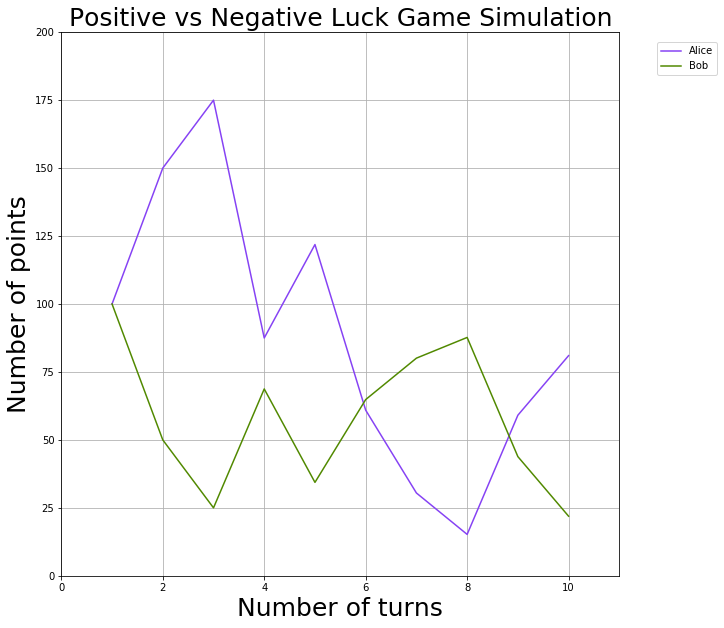

In [9]:
# Try different values in the function simulate_unfair_game() and rerun the cell
# Set variables
number_turns = 10
initial_points = 100

# Initialize figure
fig,ax = plt.subplots(figsize=(10,10))

# Adjust x, y axis
ax.set_xlim([0,number_turns + 1])
ax.set_ylim([0,200])
ax.grid(True)

# Begin simulation
[x_co,y_co_A,y_co_C] = simulate_unfair_game(initial_points,initial_points,number_turns)
    
# Plot Simulation
# Alice's points
ax.plot(x_co,y_co_A,color='#8642f4',label="Alice")

# Bob's points
ax.plot(x_co,y_co_C,color='#518900',label="Bob")

# Label the figure
ax.set_ylabel("Number of points",fontsize=25)
ax.set_xlabel("Number of turns",fontsize=25)
ax.set_title("Positive vs Negative Luck Game Simulation",fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)

# Show figure
plt.show()

#### Exercise

Turn the code above into a function whose parameters are total number of turns, and initial points for Bob and Alice. 

What happens when each player is give a different number of points? 



In [ ]:
## Your code here



<h2 align='center'>BONUS: Widgets</h2>

We can create a nice user interface to run several simulations of the game. 

The interact_manual and interact functions from the ipywidgets modules allows us to use sliders and buttons. 

In [ ]:
from ipywidgets import interact, interact_manual, widgets
def simple_function(x):
    print(x)
style = {'description_width': 'initial'}
    
interact(simple_function,x=widgets.IntSlider(
            value=10,
            min=2,
            max=100,
            step=1,
            description='Number of turns',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
));

<h2 align='center'>Challenge</h2>

The cell below contains all functions we worked on during the workshop. 

Substitute the plot_unfair_simulation(number_turns) for the function you defined plot_unfair_simulation(number_turns,points_bob,points_alicece)

Modify the interact_manual command so that widgets are added that would allow you to modify the initial number of points Bob and Alice are given. 

In [ ]:
from ipywidgets import interact, interact_manual, widgets
import random
import matplotlib.pyplot as plt

style = {'description_width': 'initial'}


def roll_dice():
    positive_luck = random.choice([1,2,4,5,6])
    negative_luck = random.choice([1,2,4,5,6])
    
    if positive_luck - negative_luck >= 0:
        return True
    else:
        return False

def simulate_unfair_game(points_A,points_C,number_of_games):
    
    x_coord = []
    y_coord_A = []
    y_coord_C = []
    
    value_A = points_A
    value_C = points_C
    
    
    turn_number = 1
    
    while turn_number <= number_of_games:
        if roll_dice():
            x_coord.append(turn_number)
            turn_number += 1
            
            y_coord_A.append(value_A)
            y_coord_C.append(value_C)
            value_A = value_A + (value_C/2)
            value_C = value_C  - (value_C/2)
            
        else:
            x_coord.append(turn_number)
            turn_number += 1
            
            y_coord_A.append(value_A)
            y_coord_C.append(value_C)
            value_A = value_A - (value_A/2)
            value_C = value_C  + (value_A/2)
    return [x_coord,y_coord_A,y_coord_C]


def plot_unfair_simulation(number_turns,__________________,________________):

    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xlim([0,number_turns + 1])
    ax.set_ylim([0,200])
    ax.grid(True)

    [x_co,y_co_A,y_co_C] = simulate_unfair_game(points_bob,_________,number_turns)
    
    ax.plot(x_co,y_co_A,color='#8642f4',label="Alice")
    ax.plot(x_co,y_co_C,color='#518900',label="Bob")
    ax.set_ylabel("Number of points",fontsize=25)
    ax.set_xlabel("Number of turns",fontsize=25)
    ax.set_title("Positive vs Negative Luck Game Simulation",fontsize=25)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)


    plt.show()
    
interact_manual(plot_unfair_simulation,number_turns=widgets.IntSlider(
            value=10,
            min=2,
            max=100,
            step=1,
            description='Number of turns',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
), points_bob=number_turns=widgets.IntSlider(
            value=100,
            min=2,
            max=100,
            step=1,
            description='Initial points for Bob',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d',
            style =style
), points_alice = ________________);